In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

Imported the modules.


In [2]:
# Load the dataset
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [3]:
# Create an empty list that will eventually hold all feature columns.
feature_columns = []

# Create a numerical feature column to represent latitude.
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

# Create a numerical feature column to represent longitude.
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
fp_feature_layer = layers.DenseFeatures(feature_columns)

In [6]:
#@title Define functions to create and train a model, and a plotting function
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


Epoch 1/30
17000/17000 [==============================] - 0s 16us/sample - loss: 24485.0011 - root_mean_squared_error: 156.4768
Epoch 2/30
17000/17000 [==============================] - 0s 10us/sample - loss: 13572.4296 - root_mean_squared_error: 116.5008
Epoch 3/30
17000/17000 [==============================] - 0s 10us/sample - loss: 13531.8765 - root_mean_squared_error: 116.3266
Epoch 4/30
17000/17000 [==============================] - 0s 11us/sample - loss: 13459.5607 - root_mean_squared_error: 116.0154
Epoch 5/30
17000/17000 [==============================] - 0s 11us/sample - loss: 13413.2549 - root_mean_squared_error: 115.8156
Epoch 6/30
17000/17000 [==============================] - 0s 11us/sample - loss: 13362.1802 - root_mean_squared_error: 115.5949
Epoch 7/30
17000/17000 [==============================] - 0s 12us/sample - loss: 13333.4906 - root_mean_squared_error: 115.4707
Epoch 8/30
17000/17000 [==============================] - 0s 10us/sample - loss: 13282.5427 - root_mean_

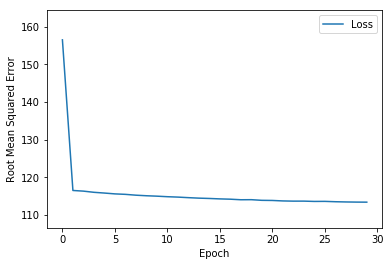


: Evaluate the new model against the test set:
3000/3000 [==============================] - 0s 23us/sample - loss: 12223.4752 - root_mean_squared_error: 110.5598


[12223.475162760416, 110.55982]

In [7]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [8]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), 
                                     int(max(train_df['latitude'])), 
                                     resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, 
                                               latitude_boundaries)
feature_columns.append(latitude)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), 
                                      int(max(train_df['longitude'])), 
                                      resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, 
                                                longitude_boundaries)
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer = layers.DenseFeatures(feature_columns)

Epoch 1/35
17000/17000 [==============================] - 0s 25us/sample - loss: 52030.4184 - root_mean_squared_error: 228.1018
Epoch 2/35
17000/17000 [==============================] - 0s 14us/sample - loss: 44636.0813 - root_mean_squared_error: 211.2726
Epoch 3/35
17000/17000 [==============================] - 0s 12us/sample - loss: 38072.6438 - root_mean_squared_error: 195.1221
Epoch 4/35
17000/17000 [==============================] - 0s 10us/sample - loss: 32271.7981 - root_mean_squared_error: 179.6436
Epoch 5/35
17000/17000 [==============================] - 0s 10us/sample - loss: 27239.4899 - root_mean_squared_error: 165.0439
Epoch 6/35
17000/17000 [==============================] - 0s 10us/sample - loss: 22973.1149 - root_mean_squared_error: 151.5689
Epoch 7/35
17000/17000 [==============================] - 0s 10us/sample - loss: 19466.5219 - root_mean_squared_error: 139.5225
Epoch 8/35
17000/17000 [==============================] - 0s 10us/sample - loss: 16679.1474 - root_mean_

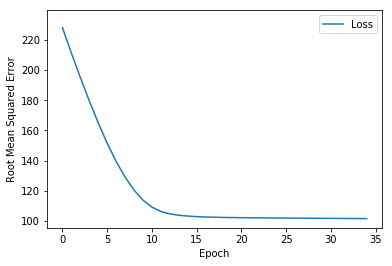


: Evaluate the new model against the test set:
3000/3000 [==============================] - 0s 29us/sample - loss: 10201.3538 - root_mean_squared_error: 101.0017


[10201.353824869791, 101.00174]

In [9]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the buckets_feature_layer.
my_model = create_model(learning_rate, buckets_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [10]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Epoch 1/35
17000/17000 [==============================] - 0s 23us/sample - loss: 53563.9534 - root_mean_squared_error: 231.4389
Epoch 2/35
17000/17000 [==============================] - 0s 15us/sample - loss: 48511.4364 - root_mean_squared_error: 220.2531
Epoch 3/35
17000/17000 [==============================] - 0s 14us/sample - loss: 43815.2054 - root_mean_squared_error: 209.3208
Epoch 4/35
17000/17000 [==============================] - 0s 14us/sample - loss: 39455.4013 - root_mean_squared_error: 198.6338
Epoch 5/35
17000/17000 [==============================] - 0s 14us/sample - loss: 35447.3140 - root_mean_squared_error: 188.2746
Epoch 6/35
17000/17000 [==============================] - 0s 14us/sample - loss: 31755.8038 - root_mean_squared_

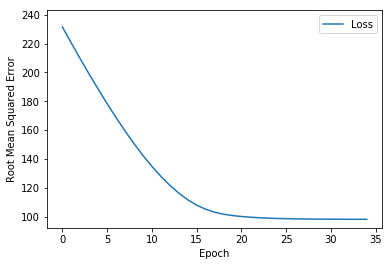


: Evaluate the new model against the test set:
3000/3000 [==============================] - 0s 39us/sample - loss: 9520.6331 - root_mean_squared_error: 97.5737


[9520.63310546875, 97.57374]

In [11]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)